<a href="https://colab.research.google.com/github/xDocka15/MPA-MLF_Dockal/blob/main/mlf_project98_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install keras-tuner --quiet

# Imports
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from google.colab import drive
from google.colab import files
import os

from keras_tuner.tuners import RandomSearch
from keras_tuner.tuners import Hyperband
from keras_tuner import BayesianOptimization, Objective
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import regularizers



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        ID  target
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0
...    ...     ...
1486  1486       0
1487  1487       1
1488  1488       0
1489  1489       0
1490  1490       0

[1491 rows x 2 columns]
[[-25.30056666 -34.54445688 -44.03216144 ... -33.43543411 -42.21318327
  -44.20080567]
 [-37.21657168 -28.83796589 -45.97329178 ... -34.13235963 -30.72768686
  -41.97746687]
 [-34.31051981 -38.17045981 -44.83255253 ... -34.5931764  -46.7704932
  -58.31586657]
 ...
 [-24.81139496 -24.35527671 -40.74519981 ... -11.69126833 -52.23467135
  -61.16893254]
 [-33.45241254 -33.25408695 -41.33245363 ... -34.77979018 -40.67456753
  -54.4493282 ]
 [-30.01098193 -26.85445864 -32.99086054 ... -34.30945241 -51.58250692
  -59.80397625]]
(72, 48)


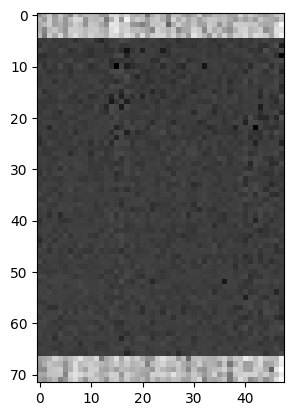

Min: -61.16893254149212
Max: 19.670490087247735
['0.npy', '1.npy', '2.npy', '3.npy', '4.npy', '5.npy', '6.npy', '7.npy', '8.npy', '9.npy']


In [17]:
# load train data
drive.mount('/content/drive')

label_path = '/content/drive/MyDrive/MPA-MLF_DATA_NEW/MPA-MLF_DATA_NEW/label_train.csv'
npy_path = '/content/drive/MyDrive/MPA-MLF_DATA_NEW/MPA-MLF_DATA_NEW/Train'

pd_dataset_train_label = pd.read_csv(label_path)
print(pd_dataset_train_label)

files = sorted([f for f in os.listdir(npy_path)], key=lambda f: int(f.replace('.npy', '')))

file_path = os.path.join(npy_path, files[426])
data = np.load(file_path)

print(data)
print(data.shape)

# 2D graph
plt.imshow(data, cmap='binary')
plt.show()

print("Min:", data.min())
print("Max:", data.max())

print(files[:10])

In [18]:
# Load files
X_train = [np.load(os.path.join(npy_path, f)) for f in files]

# stack into array
X_train = np.stack(X_train)

print(X_train.shape)

# Flatten
X_train_flat = X_train.reshape(X_train.shape[0], -1)

scaler = StandardScaler()
X_scaled_flat = scaler.fit_transform(X_train_flat)

X_scaled = X_scaled_flat.reshape(X_train.shape)

print(X_scaled.shape)

# hot end encoding
train_labels_encoded = pd.get_dummies(pd_dataset_train_label, columns=['target'])
train_labels_encoded = train_labels_encoded.astype(int)
train_labels_encoded = train_labels_encoded.drop(columns=['ID'])

print(train_labels_encoded)

(1491, 72, 48)
(1491, 72, 48)
      target_0  target_1  target_2
0            1         0         0
1            1         0         0
2            1         0         0
3            1         0         0
4            1         0         0
...        ...       ...       ...
1486         1         0         0
1487         0         1         0
1488         1         0         0
1489         1         0         0
1490         1         0         0

[1491 rows x 3 columns]


Trial 40 Complete [00h 00m 22s]
val_loss: 0.03774404525756836

Best val_loss So Far: 0.03774404525756836
Total elapsed time: 00h 20m 47s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Tuning with batch_size=32


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Tuning with batch_size=64


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Tuning with batch_size=128


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Best Hyperparameters:
batch_size: 16
val_accuracy: 1.0
val_loss: 0.037739336490631104
conv1_kernel_size_x: 3
conv1_kernel_size_y: 5
conv1_filters: 16
l2_conv1: 0.001
use_second_conv: True
pooling_type: gap
dense_units: 32
dense_activation: relu
l2_dense: 0.01
dropout_rate: 0.3
use_second_dense: False
lr: 0.01
conv2_filters: 32
l2_conv2: 0.001
dense2_units: 16
dense2_activation: elu
l2_dense2: 0.01
dropout_rate2: 0.6000000000000001
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9947 - loss: 0.1013
Epoch 1: val_loss improved from inf to 0.07032, saving model to best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9947 - loss: 0.1018 - val_accuracy: 1.0000 - val_loss: 0.0703 - learning_rate: 0.0100
Epoch 2/30
66/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9779 - loss: 0.1679
Epoch 2: val_loss did not improve from 0.07032
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9765 - loss: 0.1749 - val_accuracy: 0.9967 - val_loss: 0.1208 - learning_r

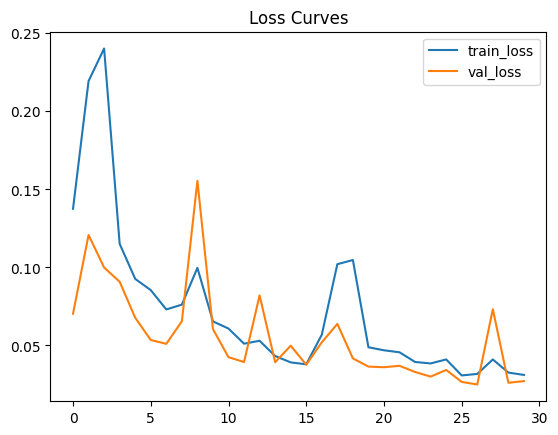

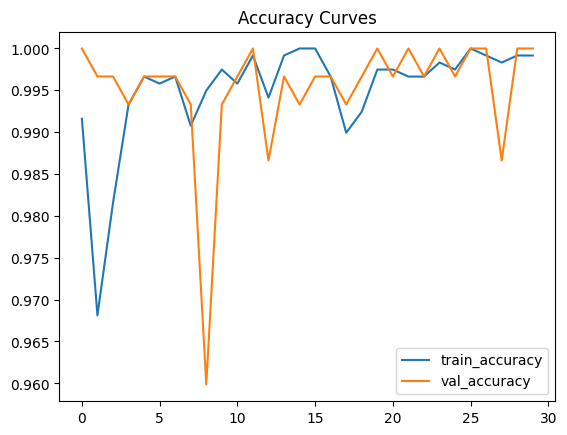

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 70, 44, 16)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 35, 22, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 35, 22, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 33, 20, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 10, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,539 (72.42 KB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 12,296 (48.04 KB)

In [ ]:

from sklearn.utils.class_weight import compute_class_weight
import shutil
shutil.rmtree('tuning_dir/cnn_bayes', ignore_errors=True)

# Compute class weights
classes = np.argmax(train_labels_encoded, axis=1)  # Convert one-hot to class indices
class_weights = compute_class_weight('balanced', classes=np.unique(classes), y=classes)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Model for tuning
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(72, 48, 1)))

    # First Conv Block
    kernel_size_x = hp.Int('conv1_kernel_size_x', min_value=3, max_value=5, step=2)
    kernel_size_y = hp.Int('conv1_kernel_size_y', min_value=3, max_value=5, step=2)
    model.add(Conv2D(
        filters=hp.Choice('conv1_filters', values=[16, 32]),
        kernel_size=(kernel_size_x, kernel_size_y),
        activation='relu',
        kernel_regularizer=regularizers.l2(hp.Float('l2_conv1', 1e-3, 1e-2, sampling='log'))
    ))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Second Conv Block
    if hp.Boolean('use_second_conv'):
        model.add(Conv2D(
            filters=hp.Choice('conv2_filters', values=[16, 32]),
            kernel_size=(3, 3),
            activation='relu',
            kernel_regularizer=regularizers.l2(hp.Float('l2_conv2', 1e-3, 1e-2, sampling='log'))
        ))
        model.add(MaxPooling2D((2, 2)))
        model.add(BatchNormalization())

    # Pooling
    pooling_type = hp.Choice('pooling_type', ['gap', 'gmp', 'flatten'])
    if pooling_type == 'gap':
        model.add(GlobalAveragePooling2D())
    elif pooling_type == 'gmp':
        model.add(GlobalMaxPooling2D())
    else:
        model.add(Flatten())

    # Dense
    model.add(Dense(
        units=hp.Choice('dense_units', values=[8, 16, 32]),
        activation=hp.Choice('dense_activation', values=['relu', 'elu']),
        kernel_regularizer=regularizers.l2(hp.Float('l2_dense', 1e-3, 1e-2, sampling='log'))
    ))
    model.add(Dropout(rate=hp.Float('dropout_rate', 0.3, 0.7, step=0.1)))

    if hp.Boolean('use_second_dense'):
        model.add(Dense(
            units=hp.Choice('dense2_units', values=[8, 16]),
            activation=hp.Choice('dense2_activation', values=['relu', 'elu']),
            kernel_regularizer=regularizers.l2(hp.Float('l2_dense2', 1e-3, 1e-2, sampling='log'))
        ))
        model.add(Dropout(rate=hp.Float('dropout_rate2', 0.3, 0.7, step=0.1)))

    # Output Layer
    model.add(Dense(3, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('lr', values=[1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode='min', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, mode='min', verbose=1),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
]

tuner = BayesianOptimization(
    build_model,
    objective=Objective("val_loss", direction="min"),
    max_trials=40,
    num_initial_points=10,
    directory='tuning_dir',
    project_name='cnn_bayes'
)

batch_sizes = [16, 32, 64, 128]
best_val_loss = float('inf')
best_val_accuracy = 0
best_batch_size = None
best_model = None
best_hps = None

for batch_size in batch_sizes:
    print(f"\nTuning with batch_size={batch_size}")
    tuner.search(
        X_scaled.reshape(-1, 72, 48, 1),
        train_labels_encoded,
        batch_size=batch_size,
        epochs=20,
        validation_split=0.2,
        callbacks=callbacks,
        class_weight=class_weight_dict,
        verbose=2
    )

    # Best model
    current_best_hps = tuner.get_best_hyperparameters(1)[0]
    current_best_model = tuner.get_best_models(1)[0]

    # Evaluate
    val_data = X_scaled[-int(0.2 * len(X_scaled)):].reshape(-1, 72, 48, 1)
    val_labels = train_labels_encoded[-int(0.2 * len(train_labels_encoded)):]
    val_loss, val_accuracy = current_best_model.evaluate(val_data, val_labels, verbose=0)

    # Update best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_val_accuracy = val_accuracy
        best_batch_size = batch_size
        best_model = current_best_model
        best_hps = current_best_hps

print("\nBest Hyperparameters:")
print(f"batch_size: {best_batch_size}")
print(f"val_accuracy: {best_val_accuracy}")
print(f"val_loss: {best_val_loss}")
for hp_name in best_hps.values.keys():
    print(f"{hp_name}: {best_hps.get(hp_name)}")

history = best_model.fit(
    X_scaled.reshape(-1, 72, 48, 1),
    train_labels_encoded,
    batch_size=best_batch_size,
    epochs=30,
    validation_split=0.2,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=1
)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss Curves')
plt.show()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.show()

best_model.summary()

In [ ]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.9992
Final Validation Accuracy: 1.0000


In [13]:
# loading Test data

npy_path1 = '/content/drive/MyDrive/MPA-MLF_DATA_NEW/MPA-MLF_DATA_NEW/Test'

files_test = sorted([f for f in os.listdir(npy_path1)], key=lambda f: int(f.replace('.npy', '')))
X_test = [np.load(os.path.join(npy_path1, f)) for f in files_test]

X_test = np.stack(X_test)

print(X_test.shape)

# Flatten
X_test_flat = X_test.reshape(X_test.shape[0], -1)

X_scaled_flat_test = scaler.fit_transform(X_test_flat)

X_scaled_test = X_scaled_flat_test.reshape(X_test.shape)

print(X_scaled_test.shape)

(120, 72, 48)
(120, 72, 48)


In [19]:
predictions = best_model.predict(X_scaled_test)

predicted_classes = np.argmax(predictions, axis=1)

print(predicted_classes)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[1 0 1 0 0 0 2 0 2 0 1 1 1 0 1 2 0 2 2 2 0 0 2 1 0 0 2 1 1 1 2 0 2 2 2 0 2
 0 0 0 1 2 1 0 1 2 1 0 2 1 1 0 2 0 0 1 0 1 2 0 2 1 1 2 1 1 2 1 0 2 1 1 2 2
 2 1 1 2 2 2 0 1 2 2 0 2 0 1 0 2 2 1 2 0 2 0 0 2 0 0 0 0 0 1 2 2 1 0 1 2 2
 0 1 1 0 1 2 0 0 1]


In [15]:

# Convert filenames to IDs
ids = [int(f.replace('.npy', '')) for f in files_test]
predicted_classes = np.array(predicted_classes).flatten()

submission_df = pd.DataFrame({
    'ID': ids,
    'target': predicted_classes
})

# Sort by ID
submission_df = submission_df.sort_values(by='ID')

submission_df.to_csv('submission.csv', index=False)

# Download
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>